In [18]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset("penguins").dropna()

In [19]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


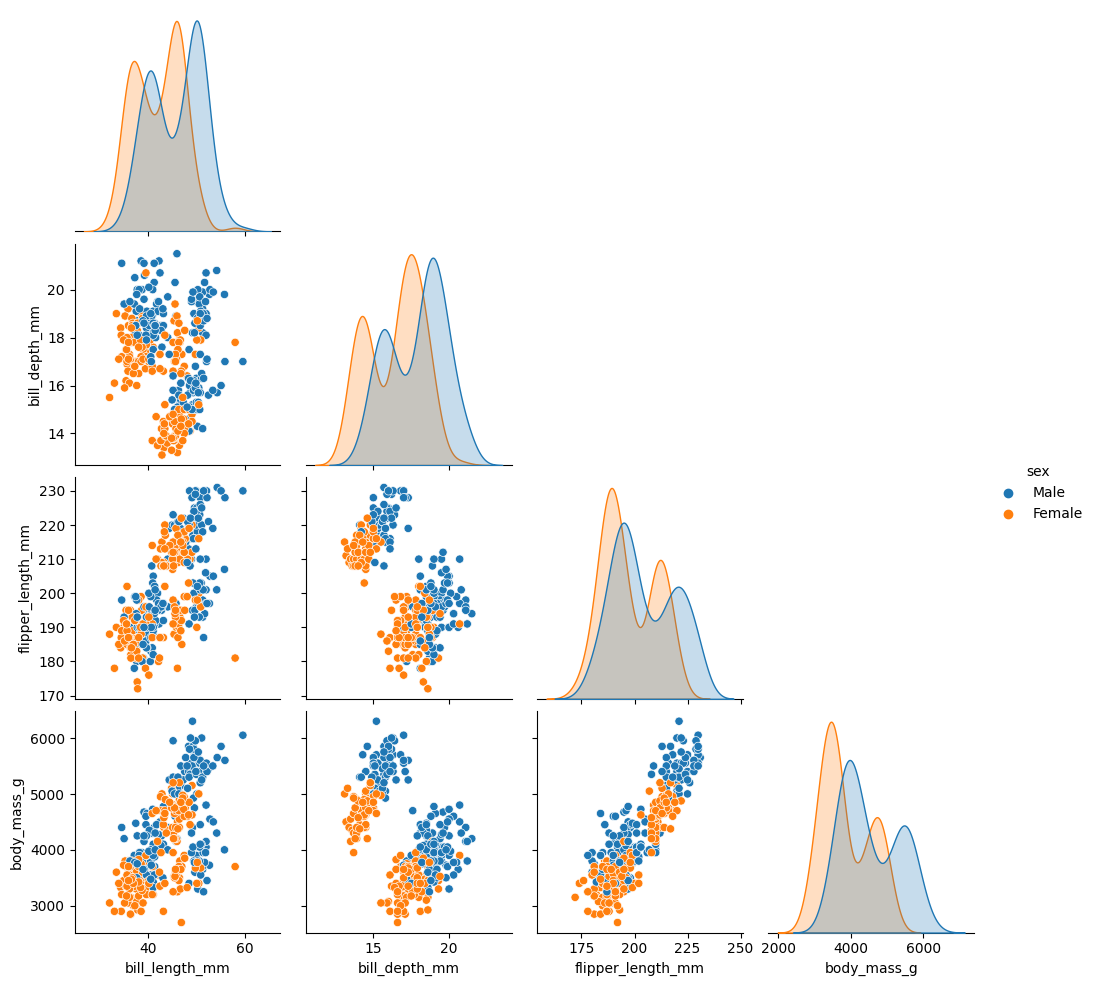

In [60]:
pairplot = sns.pairplot(
    data=penguins,
    hue="sex",
    corner=True
)

In [38]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=5, random_state=42)
)

pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [54]:
penguins_sex = pd.get_dummies(penguins, columns=["sex", "island"], drop_first=True)
penguins_sex.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1


In [55]:
result = pipeline.fit(penguins_sex[[
        "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g",
        "sex_Male", "island_Dream", "island_Torgersen"
    ]])

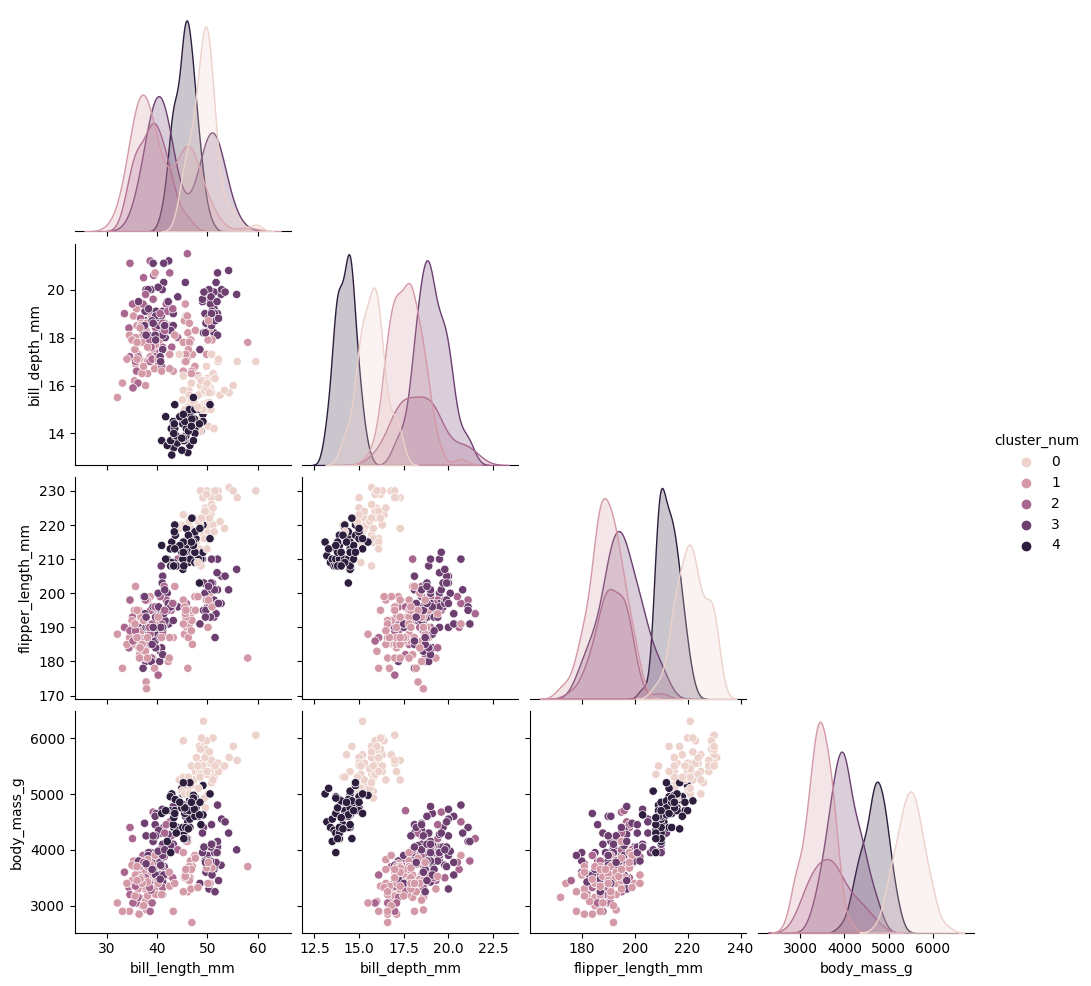

In [58]:
cluster_pairplot = sns.pairplot(
    data=penguins.assign(cluster_num = result[1].labels_),
    hue="cluster_num",
    corner=True
)

cluster_pairplot.savefig("./5clust_categoricals.png")